In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [62]:
"""
first, we need to import all the data in ov_datasets.csv
which has gathered all tumor volume data in McCart 2021 et al. with webplotdigitizer

data structure:
1. the first 20 columns are the tumor volume under vvDD condition
   specifying x (time) and y (tumor volume) for each two columns, totalling 10 samples
   the first row can be ignored
   the 1-5 rows are the 5 time points for all 10 samples
2. the next 20 columns are the tumor volume under normal/PBS condition with similar structure
3. the last four columns are the mean and stde data of the tumor volume under vvDD condition and normal/PBS condition
   each two columns specify one condition, respectively the x and y
   each three rows specify one time point: mean, stde+, and stde-
   again, the first row can be ignored

"""

df = pd.read_csv('/Users/yuhongliu/Documents/OV/data/ov_datasets_v7.csv')

# Extract tumor volume data for vvDD condition
tumor_vol_vvDD = df.iloc[1:6, 1:20:2].values  # Select every other column starting from the second column (Y values)
# Create a DataFrame with known time points and extracted tumor volumes
tumor_vol_vvDD_df = pd.DataFrame(tumor_vol_vvDD, index=[0, 1, 2, 3, 4], columns=[f'vvDD_sample_{i+1}' for i in range(10)])

# Extract tumor volume data for normal/PBS condition
tumor_vol_pbs = df.iloc[1:6, 21:40:2].values  # Select every other column starting from the 21 column (Y values)
# Create a DataFrame with known time points and extracted tumor volumes
tumor_vol_pbs_df = pd.DataFrame(tumor_vol_pbs, index=[0, 1, 2, 3, 4], columns=[f'pbs_sample_{i+1}' for i in range(10)])

# Extract mean and standard deviation data for vvDD and PBS conditions, for comparison with the two dataframes above
vvDD_mean_stde_data = df.iloc[1:, -3].values
pbs_mean_stde_data = df.iloc[1:, -1].values
# Create DataFrames for vvDD and PBS data
vvDD_mean_stde_df = pd.DataFrame(vvDD_mean_stde_data.reshape(-1, 3), 
                                 index=[0, 1, 2, 3, 4], 
                                 columns=['mean', 'stde_plus', 'stde_minus'])

pbs_mean_stde_df = pd.DataFrame(pbs_mean_stde_data.reshape(-1, 3), 
                                index=[0, 1, 2, 3, 4], 
                                columns=['mean', 'stde_plus', 'stde_minus'])

# convert data to numeric type
tumor_vol_vvDD_df = tumor_vol_vvDD_df.apply(pd.to_numeric, errors='coerce')
tumor_vol_pbs_df = tumor_vol_pbs_df.apply(pd.to_numeric, errors='coerce')
vvDD_mean_stde_df = vvDD_mean_stde_df.apply(pd.to_numeric, errors='coerce')
pbs_mean_stde_df = pbs_mean_stde_df.apply(pd.to_numeric, errors='coerce')


In [63]:
tumor_vol_vvDD_df

,vvDD_sample_1,vvDD_sample_2,vvDD_sample_3,vvDD_sample_4,vvDD_sample_5,vvDD_sample_6,vvDD_sample_7,vvDD_sample_8,vvDD_sample_9,vvDD_sample_10
0,1.585933e+06,1.676076e+06,1.788754e+06,1.946504e+06,2.994412e+06,3.569072e+06,3.715553e+06,3.805696e+06,4.357820e+06,4.436695e+06
1,2.385949e+06,2.870466e+06,1.878897e+06,2.893002e+06,3.704286e+06,3.253572e+06,5.518406e+06,4.673319e+06,5.202907e+06,3.400054e+06
2,1.428184e+06,1.698612e+06,1.033810e+06,3.107090e+06,1.022542e+06,2.859198e+06,3.366251e+06,3.929642e+06,3.974714e+06,3.512732e+06
3,1.247898e+06,1.225363e+06,7.746494e+05,6.845068e+05,8.873277e+05,1.484523e+06,2.712716e+06,1.631005e+06,2.757788e+06,1.191559e+06
4,1.774543e+05,3.577396e+05,2.675970e+05,1.887222e+05,6.732389e+05,9.211312e+05,2.070450e+06,1.214095e+06,2.216932e+06,1.315505e+06


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/var/folders/2t/ydbb2dx16f3_f00v2ldb8_8m0000gn/T/ipykernel_22348/284567833.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Tumor Volume ($\mu m^3$)')


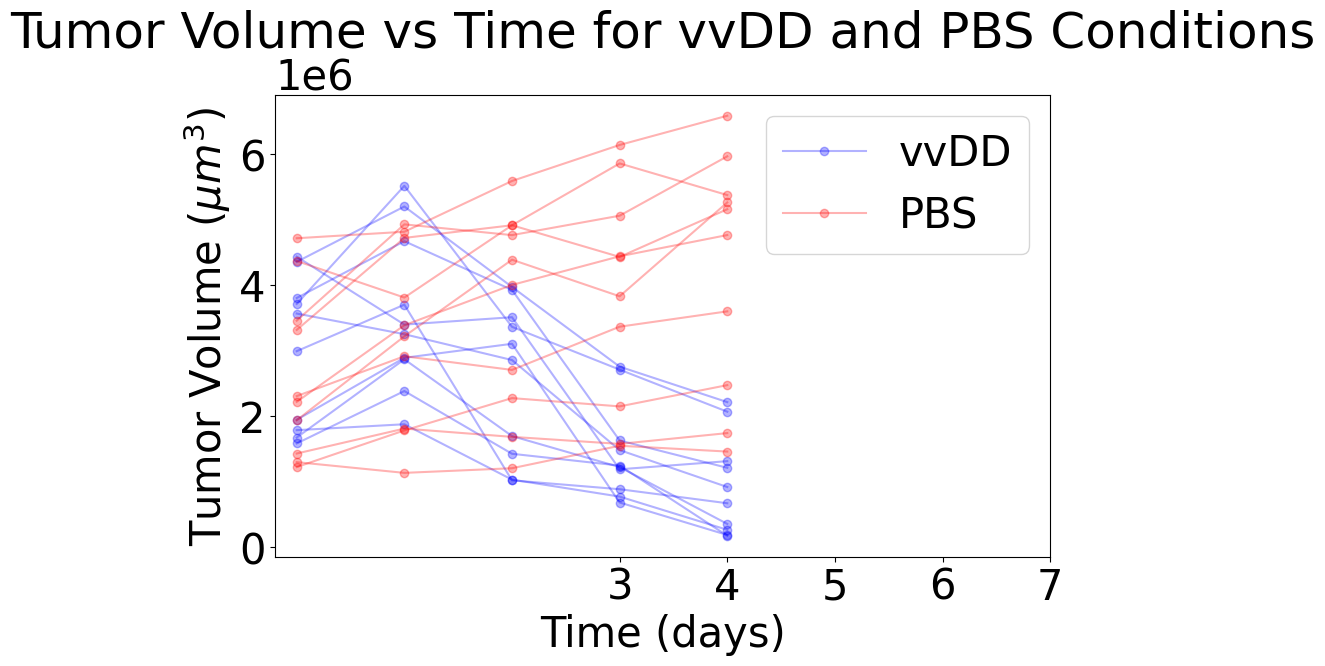

In [64]:
# plot the tumor volume data for vvDD and PBS condition
plt.figure(figsize=(10, 6))

# Plot vvDD data
for i in range(10):
    plt.plot(tumor_vol_vvDD_df.index, tumor_vol_vvDD_df.iloc[:, i], 
             marker='o', linestyle='-', color='blue', alpha=0.3, label='vvDD' if i == 0 else "")

# Plot PBS data
for i in range(10):
    plt.plot(tumor_vol_pbs_df.index, tumor_vol_pbs_df.iloc[:, i], 
             marker='o', linestyle='-', color='red', alpha=0.3, label='PBS' if i == 0 else "")

plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume ($\mu m^3$)')
plt.title('Tumor Volume vs Time for vvDD and PBS Conditions')
plt.legend()
plt.grid(False)
plt.xticks([3, 4, 5, 6, 7])
plt.show()

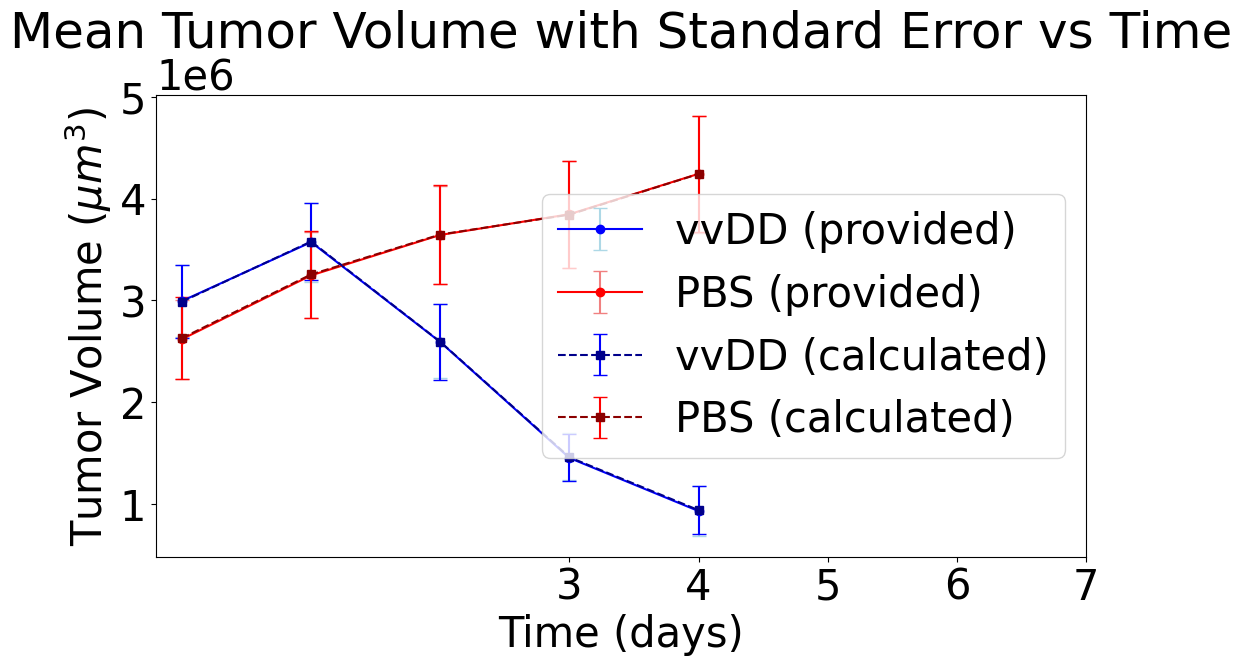

In [65]:
# plot the mean and stde data for vvDD and PBS condition

# Calculate mean and standard error for vvDD
vvDD_mean = tumor_vol_vvDD_df.mean(axis=1)
vvDD_se = tumor_vol_vvDD_df.sem(axis=1)
# Calculate mean and standard error for PBS
pbs_mean = tumor_vol_pbs_df.mean(axis=1)
pbs_se = tumor_vol_pbs_df.sem(axis=1)

# Plot both provided and calculated data
plt.figure(figsize=(12, 6))
# Plot provided data
plt.errorbar(vvDD_mean_stde_df.index, vvDD_mean_stde_df['mean'], 
             yerr=[vvDD_mean_stde_df['mean'] - vvDD_mean_stde_df['stde_minus'], 
                   vvDD_mean_stde_df['stde_plus'] - vvDD_mean_stde_df['mean']],
             fmt='o-', color='blue', ecolor='lightblue', capsize=5, label='vvDD (provided)')
plt.errorbar(pbs_mean_stde_df.index, pbs_mean_stde_df['mean'], 
             yerr=[pbs_mean_stde_df['mean'] - pbs_mean_stde_df['stde_minus'], 
                   pbs_mean_stde_df['stde_plus'] - pbs_mean_stde_df['mean']],
             fmt='o-', color='red', ecolor='lightcoral', capsize=5, label='PBS (provided)')
# Plot calculated data
plt.errorbar(vvDD_mean.index, vvDD_mean, yerr=vvDD_se,
             fmt='s--', color='darkblue', ecolor='blue', capsize=5, label='vvDD (calculated)')
plt.errorbar(pbs_mean.index, pbs_mean, yerr=pbs_se,
             fmt='s--', color='darkred', ecolor='red', capsize=5, label='PBS (calculated)')
plt.xlabel('Time (days)')
plt.ylabel(r'Tumor Volume ($\mu m^3$)')
plt.title('Mean Tumor Volume with Standard Error vs Time')
plt.legend()
plt.grid(False)
plt.xticks([3, 4, 5, 6, 7])
plt.show()



In [76]:


# Find the highest volume in tumor_vol_vvDD_df
max_vvDD_volume = tumor_vol_vvDD_df.max().max()
print(f"Highest volume in vvDD condition: {max_vvDD_volume}")

# Find the highest volume in tumor_vol_pbs_df
max_pbs_volume = tumor_vol_pbs_df.max().max()
print(f"Highest volume in PBS condition: {max_pbs_volume}")

Highest volume in vvDD condition: 5518406.411637157
Highest volume in PBS condition: 6588397.532246955


In [75]:
# Combine day 0 data for vvDD and PBS samples
day0_vvDD = tumor_vol_vvDD_df.iloc[0]
day0_pbs = tumor_vol_pbs_df.iloc[0]
day0_combined = pd.concat([day0_vvDD, day0_pbs])

# Calculate the average volume at day 0 for all samples
day0_avg = day0_combined.mean()

print(f"Average volume at day 0 for all samples: {day0_avg}")

print(f"Average cell at day 0 for all samples: {day0_avg/(7.5**3)}, {np.log(day0_avg/(7.5**3)/400)}, {24*np.log(2)/(np.log(day0_avg/(7.5**3)/400))}")

print(f"Average cell at day 0 for all samples: {day0_avg/(11**3)}, {np.log(day0_avg/(11**3)/400)}, {24*np.log(2)/(np.log(day0_avg/(11**3)/400))}")

Average volume at day 0 for all samples: 2808614.282779374
Average cell at day 0 for all samples: 6657.456077699258, 2.812028173141783, 5.915848387412269
Average cell at day 0 for all samples: 2110.153480675713, 1.6630514163734655, 10.003017447118365


In [28]:
# rescale the tumor volume to tumor cell number
scaled = True

if scaled:
    conversion_fac = 18 ** 3 # 7.5 um is the average diameter of an OV cell
    tumor_vol_vvDD_df = tumor_vol_vvDD_df / conversion_fac
    tumor_vol_pbs_df = tumor_vol_pbs_df / conversion_fac

In [29]:
# make the measurement.tsv file
def create_rows(df, condition):
    rows = []
    for time in df.index:
        for col in df.columns:
            rows.append({
                'observableId': 'tumor_num' if scaled else 'tumor_vol',
                'simulationConditionId': condition,
                'measurement': df.loc[time, col],
                'time': time,
                # 'observableParameters': 'scaling_1',
                # 'noiseParameters': 'sd_vol'
            })
    return rows

# Create rows for vvDD and PBS conditions
vvDD_rows = create_rows(tumor_vol_vvDD_df, 'vvDD')
pbs_rows = create_rows(tumor_vol_pbs_df, 'ctrl')

# Combine all rows
all_rows = vvDD_rows + pbs_rows

# Create the final dataframe
measurements_df = pd.DataFrame(all_rows)

# Reorder columns to match the specified order
column_order = ['observableId', 'simulationConditionId', 'measurement', 'time',
                #  'observableParameters',
                #    'noiseParameters'
                ]
measurements_df = measurements_df[column_order]

# Save to TSV file
if scaled:
    measurements_df.to_csv('petab_files/measurements_noscaling_newnoise_scaled.tsv', sep='\t', index=False)
else:
    measurements_df.to_csv('petab_files/measurements_noscaling_newnoise.tsv', sep='\t', index=False)

In [30]:
# Calculate the coefficient of variation for vvDD condition
vvDD_cv = tumor_vol_vvDD_df.std(axis=1) / tumor_vol_vvDD_df.mean(axis=1)

# Calculate the coefficient of variation for PBS condition
pbs_cv = tumor_vol_pbs_df.std(axis=1) / tumor_vol_pbs_df.mean(axis=1)

# Display the results
print("Coefficient of Variation for vvDD condition:")
print(vvDD_cv)

print("\nCoefficient of Variation for PBS condition:")
print(pbs_cv)

Coefficient of Variation for vvDD condition:
0    0.381965
1    0.336355
2    0.454973
3    0.503129
4    0.803177
dtype: float64

Coefficient of Variation for PBS condition:
0    0.482332
1    0.416977
2    0.423722
3    0.433913
4    0.426438
dtype: float64


In [31]:
tumor_vol_vvDD_df.std(axis=1)

0    195.675429
1    206.362587
2    202.309846
3    125.931833
4    129.495291
dtype: float64

In [32]:
tumor_vol_vvDD_df.mean(axis=1)

0    512.285920
1    613.526380
2    444.663476
3    250.297249
4    161.228829
dtype: float64

In [33]:
# 1. Create the model file using antimony
# this is being done in model_creation.py

# 2. Create the parameter table
parameter_df = pd.DataFrame({
    'parameterId': ['rho', 'kappa', 'psi', 'beta', 'alpha', 'delta', 'sigma_add', 'sigma_mul'],
    'parameterName': ['rho', 'kappa', 'psi', 'beta', 'alpha', 'delta', 'additive_noise', 'multiplicative_noise'],
    'parameterScale': ['log10', 'log10', 'log10', 'log10', 'log10', 'log10', 'log10', 'log10'],
    'lowerBound': [0.42, 1e2, 1e-10, 1e0, 1e-4, 1e-2, 1e1, 1e-4],
    'upperBound': [1.66, 1e5, 1e-2, 1e4, 1e3, 1e2, 1e5, 1e2],
    'nominalValue': [1] * 8,
    'estimate': [1] * 8,
    'parameterType': ['', '', '', '', '', '', '', '']
})
# export the parameter table to tsv file
parameter_df.to_csv('petab_files/parameters_no_scaling_new_noise_formula.tsv', sep='\t', index=False)

# 3. Create the observable table
observable_df = pd.DataFrame({
    'observableId': ['tumor_vol' if not scaled else 'tumor_num'],
    'observableName': ['tumor_volume' if not scaled else 'tumor_number'],
    'observableFormula': ['C_u + C_i'],
    'noiseFormula': ['sqrt(sigma_add^2 + (sigma_mul * (C_u + C_i))^2)'],
    'noiseDistribution': ['normal'],
    'observableTransformation': ['lin']
})
# export the observable table to tsv file
observable_df.to_csv('petab_files/observables_no_scaling_new_noise_formula_scaled.tsv', sep='\t', index=False)

# 4. Create the measurement table
# this is being done above

# 5. Create the condition table
condition_df = pd.DataFrame({
    'conditionId': ['vvDD', 'ctrl'],
    'conditionName': ['vvDD', 'ctrl'],
    'virus_injection': [1e9, 0]
})
# export the condition table to tsv file
condition_df.to_csv('petab_files/conditions.tsv', sep='\t', index=False)


In [34]:
# TODO: adjust the rho limit and refit the model
# TODO: delete the scaling parameter
    # TODO: adjust the corresponding parameter bounds
# TODO: adjust the noise formula
    # TODO: adjust the additive noise bounds
# TODO: refit the models
# TODO: scale the data to tumor cell number
# TODO: check the issue with psi and noise parameters

# TODO: do for all models

# DONE: correct the std plotting
# DONE: parameter plot error in code

# For publication fig 1

In [35]:
folder_path = '/Users/yuhongliu/Documents/OV/figures/ifac_first_model/'

# Plot setting
plt.rcParams['font.size'] = 30

dpi = 100
wid = int(2560/dpi)
hei = int(1600/dpi)

In [59]:
red_color = '#f78884'
blue_color = '#06688c'

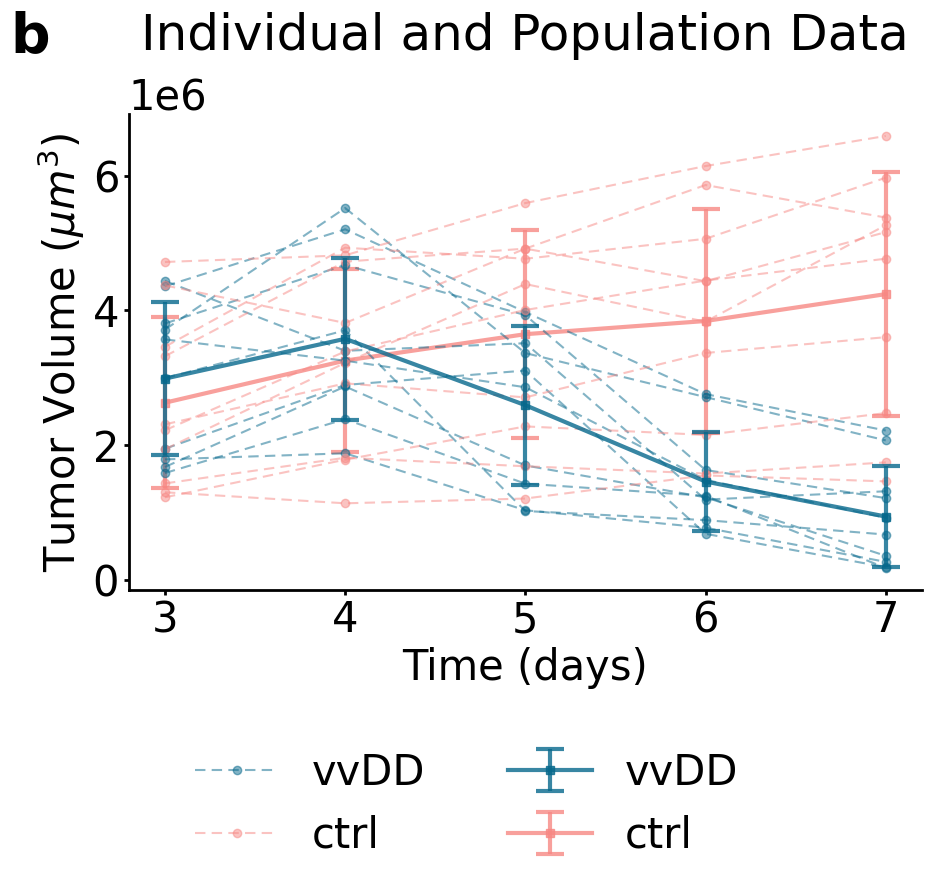

In [60]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 8))

# Panel a
# Plot vvDD data
for i in range(10):
    axs.plot(tumor_vol_vvDD_df.index+3, tumor_vol_vvDD_df.iloc[:, i]*conversion_fac, 
             marker='o', linestyle='--', dashes=(5, 3), color=blue_color, alpha=0.5, label='vvDD' if i == 0 else "")

# Plot PBS data
for i in range(10):
    axs.plot(tumor_vol_pbs_df.index+3, tumor_vol_pbs_df.iloc[:, i]*conversion_fac, 
             marker='o', linestyle='--', dashes=(5, 3), color=red_color, alpha=0.5, label='ctrl' if i == 0 else "")

# Calculate mean and standard error for vvDD
vvDD_mean = (tumor_vol_vvDD_df*conversion_fac).mean(axis=1)
vvDD_std = (tumor_vol_vvDD_df*conversion_fac).std(axis=1)
# Calculate mean and standard error for PBS
pbs_mean = (tumor_vol_pbs_df*conversion_fac).mean(axis=1)
pbs_std = (tumor_vol_pbs_df*conversion_fac).std(axis=1)

# Plot provided data
axs.errorbar(vvDD_mean.index+3, vvDD_mean, yerr=vvDD_std,
             fmt='s-', lw=3, color=blue_color, ecolor=blue_color, alpha=.8, capsize=10, capthick=3, label='vvDD')
axs.errorbar(pbs_mean.index+3, pbs_mean, yerr=pbs_std,
             fmt='s-', lw=3, color=red_color, ecolor=red_color, alpha=.8, capsize=10, capthick=3, label='ctrl', zorder=1)


axs.set_xlabel('Time (days)')
axs.set_ylabel(r'Tumor Volume ($\mu m^3$)') 
axs.set_title('Individual and Population Data', pad=20, loc='center')
axs.grid(False)
axs.set_xticks([3, 4, 5, 6, 7])

axs.text(-0.1, 1.22, 'b', transform=axs.transAxes, fontsize=40, fontweight='bold', va='top', ha='right')

# Adjust layout and save the figure
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.2))

# Remove top and right lines
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

# Make spines thicker
axs.spines['left'].set_linewidth(2)
axs.spines['bottom'].set_linewidth(2)

# Make ticks thicker
axs.tick_params(width=2)

plt.tight_layout()
plt.subplots_adjust(wspace=0.6)  # Add more space between subplots
plt.savefig(folder_path + 'original_data.pdf', dpi=300, bbox_inches='tight')
plt.show()